In [1]:
import pandas as pd
import numpy as np

## Задача 1

#### Постройте график
#### Назовите график
#### Сделайте именование оси x и оси y
#### Сделайте выводы

In [2]:
df = pd.read_csv('kc_house_data.csv', sep = ',', quoting=3)
df['id'] = df['id'].str.replace('"', '')
df['date'] = df['date'].str.replace('"', '')
df['floors'] = df['floors'].str.replace('"', '')
df['zipcode'] = df['zipcode'].str.replace('"', '')
df['sqft_lot15'] = df['sqft_lot15'].str.replace('"', '')
df['id'] = df['id'].astype('int64')
df['floors'] = df['floors'].astype('float')
df['zipcode'] = df['zipcode'].astype('int64')
df['sqft_lot15'] = df['sqft_lot15'].astype('int64')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

### 1.2 Изучите стоимости недвижимости

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

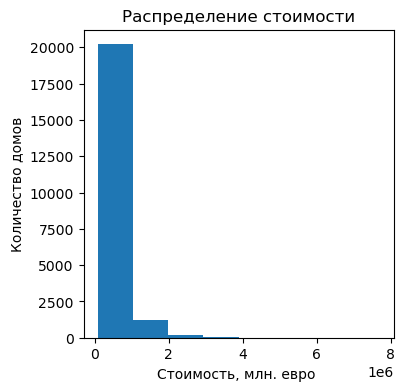

In [4]:
plt.figure(figsize=(4, 4))
plt.hist(df['price'], bins=8)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость, млн. евро ')
plt.ylabel('Количество домов');

### 1.3 Изучите распределение квадратуры жилой

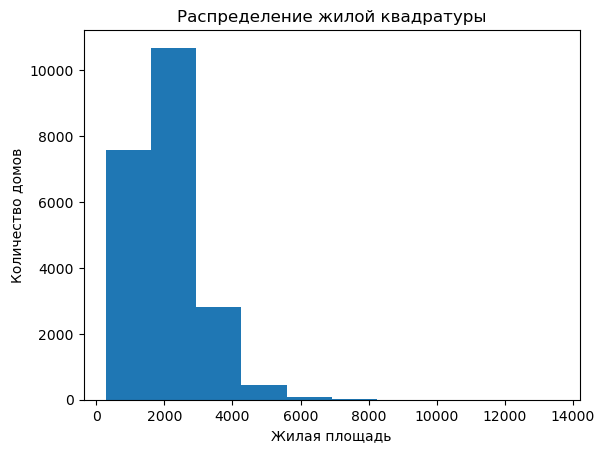

In [5]:
plt.hist(df['sqft_living'])
plt.title('Распределение жилой квадратуры')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

### 1.4 Изучите распределение года постройки

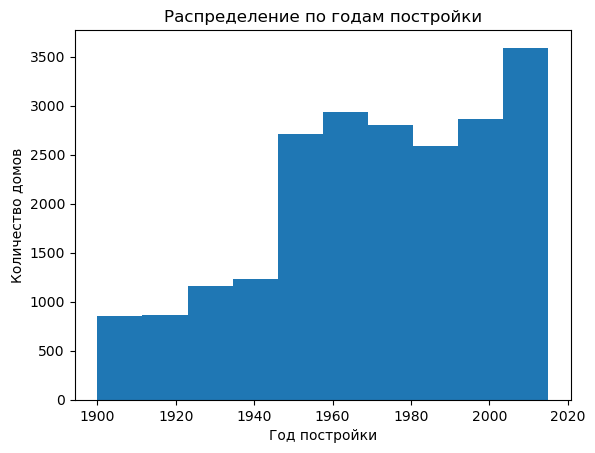

In [6]:
plt.hist(df['yr_built'])
plt.title('Распределение по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

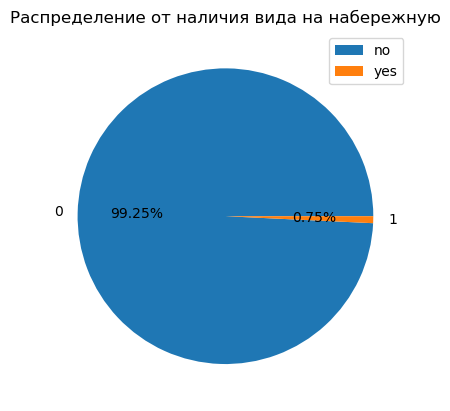

In [7]:
data = df['waterfront'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%.2f%%')
plt.title('Распределение от наличия вида на набережную')
plt.legend(['no', 'yes']);


#### Вывод: *Подавляющее большинство домов не имеют вида на набережную. Менее 1% (0,75) домов имеют вид на набережную*

### 2.2 Изучите распределение этажей домов

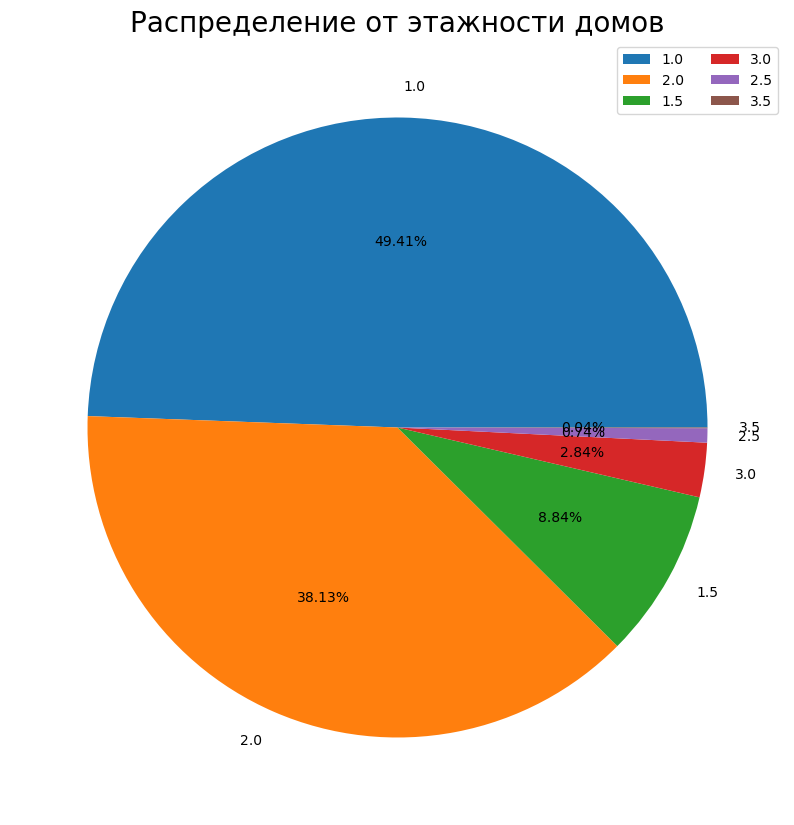

In [20]:
data = df['floors'].value_counts()

plt.figure(figsize=(10, 12))
plt.pie(data.values, labels=data.index, autopct='%.2f%%');
plt.title('Распределение от этажности домов', fontsize=20)
plt.legend(data.index, ncol = 2, loc = 0);

#### Вывод: *Почти половина домов одноэтажные. 40% составляют 2 этажные дома. Остальное процентное отношение приходится на остальную этажность.*

### 2.3 Изучите распределение состояния домов

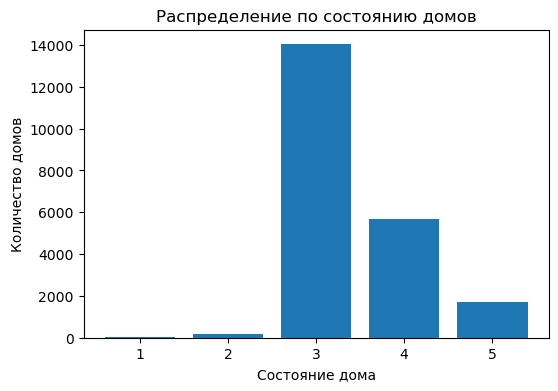

In [21]:
data = df['condition'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)

plt.title('Распределение по состоянию домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

#### Вывод: *Дома в основном находятся в удовлетворительном состоянии. Домов в плохом и неудовлетворительном состоянии крайне мало*

## 3 задача

1. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
2. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [10]:
data = df.groupby('grade')['price'].mean().reset_index()
data.head()

,grade,price
0,1,142000.000000
1,3,205666.666667
2,4,214381.034483
3,5,248523.971074
4,6,301919.637390


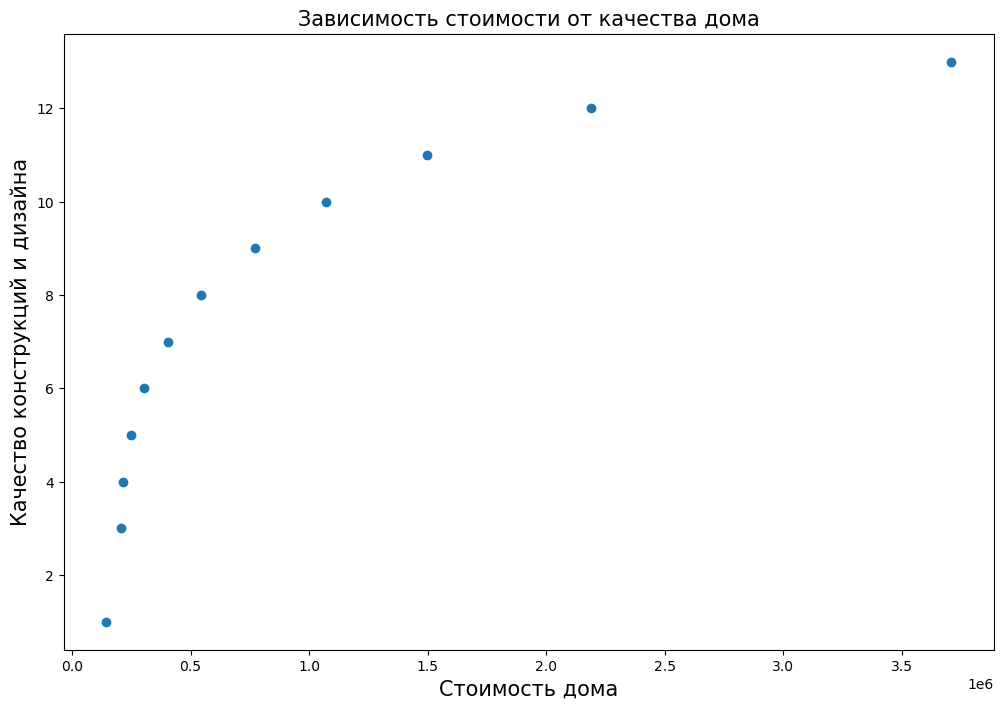

In [11]:
plt.figure(figsize=(12, 8))

plt.scatter(data['price'], data['grade'])

plt.title('Зависимость стоимости от качества дома', fontsize=15)
plt.xlabel('Стоимость дома', fontsize=15)
plt.ylabel('Качество конструкций и дизайна', fontsize=15);

### Чем выше качество конструкций и дизайна, тем выше средняя стоимость дома

In [12]:
data = df.groupby('floors')['price'].mean().reset_index()
data.head()

,floors,price
0,1.0,4.421806e+05
1,1.5,5.589806e+05
2,2.0,6.488912e+05
3,2.5,1.060346e+06
4,3.0,5.825260e+05


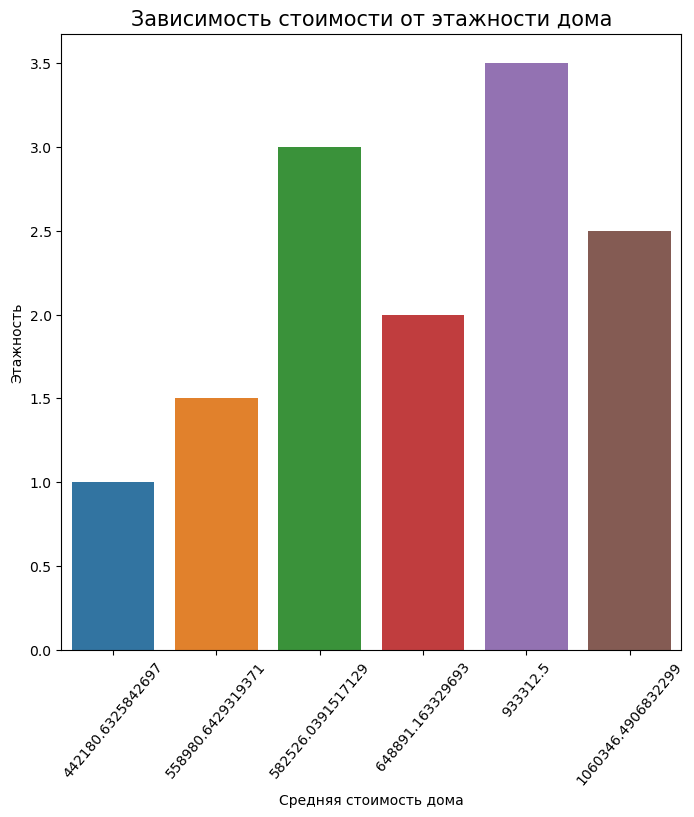

In [13]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data['price'], y=data['floors'])

plt.title('Зависимость стоимости от этажности дома', fontsize=15)
plt.xlabel('Средняя стоимость дома', fontsize=10)
plt.ylabel('Этажность', fontsize=10);
plt.xticks(rotation=50);

**Вывод:** Средняя стоимость дома прямо зависит от его этажности

In [14]:
data = df.groupby('condition')['price'].max().reset_index()
data.head()

,condition,price
0,1,1500000.0
1,2,2555000.0
2,3,7062500.0
3,4,7700000.0
4,5,3650000.0


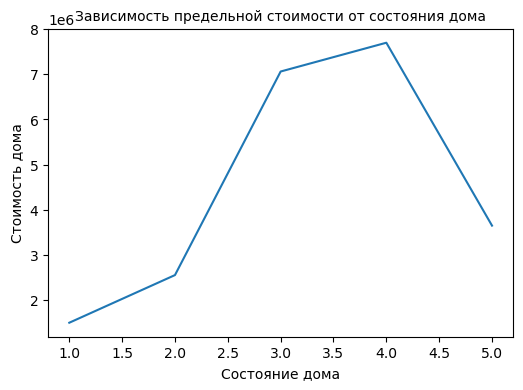

In [15]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=data['condition'], y=data['price'])

plt.title('Зависимость предельной стоимости от состояния дома', fontsize=10)
plt.xlabel('Состояние дома')
plt.ylabel('Стоимость дома');

**Вывод:** Дома в отличном состоянии (5) необязательно самые дорогие

In [16]:
data = pd.crosstab(index = df['condition'],
                   columns= df['waterfront'],
                   values=df['price'],
                   aggfunc='mean').reset_index()
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data

waterfront,condition,no,yes
0,1,323274.137931,6.580000e+05
1,2,314259.584795,2.555000e+06
2,3,534067.617217,1.759076e+06
3,4,512325.655534,1.520318e+06
4,5,600917.417014,1.579050e+06


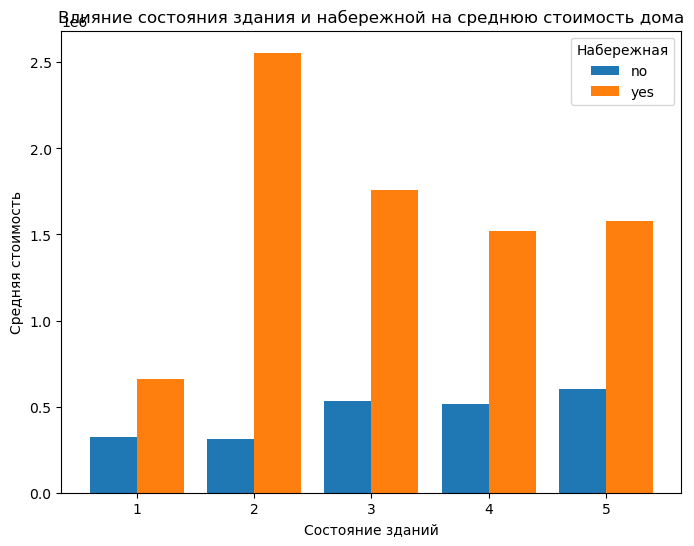

In [17]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Влияние состояния здания и набережной на среднюю стоимость дома')
plt.xlabel('Состояние зданий')
plt.ylabel('Средняя стоимость')
plt.legend(['no', 'yes'], title = 'Набережная')
plt.xticks(n_ticks, data['condition']);

**Вывод:** Наличие вида на набережную существенно увеличивает стоимость дома. При этом, средняя стоимость домов в плохом состоянии (2), но, имеющих вид на набережную, значительно завышен 

In [18]:
def convert(x):
    if x.endswith('T000000'):
        res = x.replace('T000000', '')[:4]
    return res

df.head()  
df['year_sale'] = df['date'].apply(convert)
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015


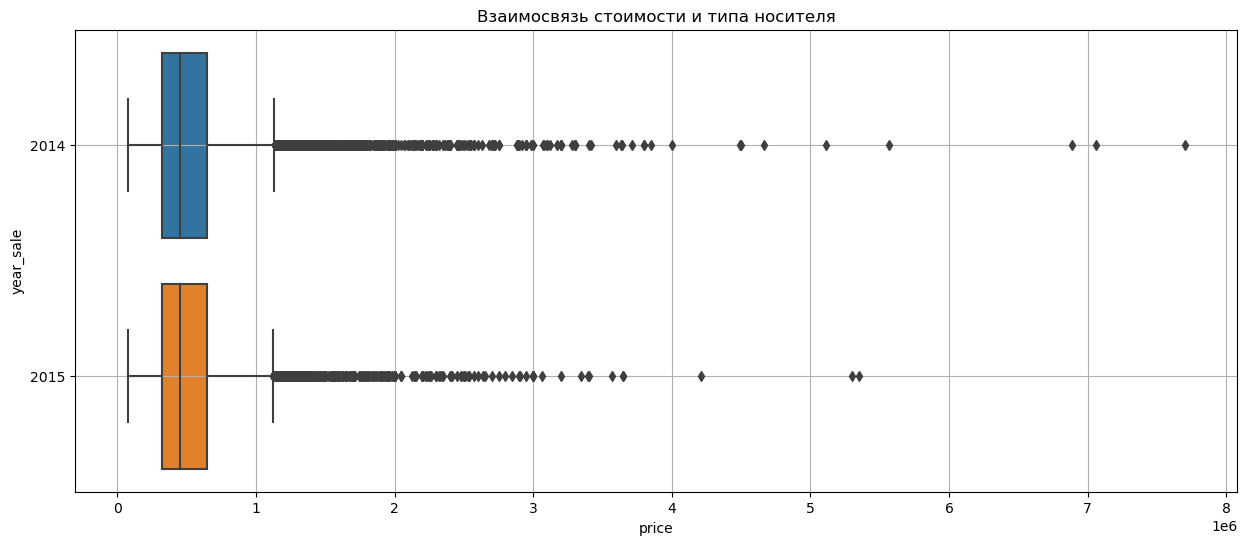

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['price'], y=df['year_sale'])
plt.title('Взаимосвязь стоимости и типа носителя')
plt.xlabel('price')
plt.ylabel('year_sale')
plt.grid(True);

**Вывод:** Нормальное распределение стоимости продажа домов в 2014 и 2015 в пределах примерно от 50 тысяч до 1100 тысяч. Остальные значения - это выброс.